OASIS MRI Data in Young, Middle Aged,Nondemented, and Demented Older Adults

Reference : http://www.oasis-brains.org/

People with CDR value zero are classified as without dementia and those with CDR 0.5,1 and 2 with dementia.
No: of people with dementia 187
No of people without dementia 249


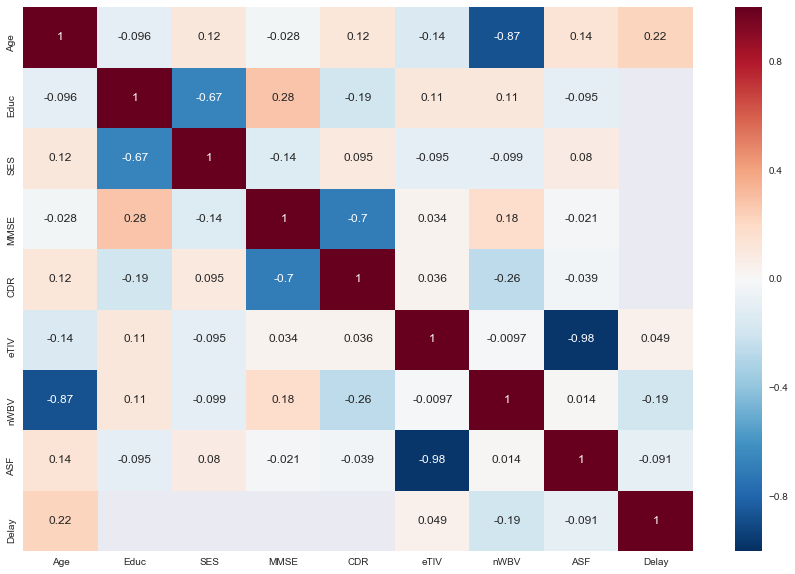

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data1=pd.read_csv('oasis_cross-sectional.csv')
data1 = data1.fillna(method='pad')
    
n_nondem=len(data1[data1['CDR']==0.0])

print "People with CDR value zero are classified as without dementia and those with CDR 0.5,1 and 2 with dementia."
print "No: of people with dementia {}".format(data1.shape[0]-n_nondem)
print "No of people without dementia {}".format(n_nondem)

import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(data1.corr(), annot=True)
plt.show()
  


In [2]:
from sklearn.preprocessing import LabelEncoder

data1.drop(['ID'], axis=1, inplace=True)
data1.drop(['Hand'], axis=1, inplace=True)
data1.drop(['Delay'], axis=1, inplace=True)

le=LabelEncoder()
data1['M/F']=le.fit_transform(data1['M/F'])



In [3]:
from sklearn.cross_validation import train_test_split

target_class = np.asarray(data1['CDR'], dtype="|S6")
features = data1.drop('CDR', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(features,target_class, test_size=0.25, random_state=42)
y_train=list(y_train)
y_test=list(y_test)


C:\Users\sree_\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from time import time


clf_A=GaussianNB()
clf_B=tree.DecisionTreeClassifier(random_state=0)
clf_C=SVC()
clf_D=RandomForestClassifier()
clf_E=KNeighborsClassifier()
clf_F=MLPClassifier(random_state=1)

for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    
    print "\n{}: \n".format(clf.__class__.__name__)
    start = time()
  
    clf.fit(X_train, y_train)
    
    end = time()
    print "Trained model in {:.4f} milliseconds".format((end - start)*1000)
    

    y_pred = clf.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print "Accuracy for test set is {}".format(accuracy)
    


GaussianNB: 

Trained model in 0.9999 milliseconds
Accuracy for test set is 0.633027522936

DecisionTreeClassifier: 

Trained model in 2.0001 milliseconds
Accuracy for test set is 0.697247706422

SVC: 

Trained model in 13.0000 milliseconds
Accuracy for test set is 0.559633027523

RandomForestClassifier: 

Trained model in 26.0000 milliseconds
Accuracy for test set is 0.743119266055

KNeighborsClassifier: 

Trained model in 3.0000 milliseconds
Accuracy for test set is 0.532110091743

MLPClassifier: 

Trained model in 11.9998 milliseconds
Accuracy for test set is 0.559633027523
